<a href="https://colab.research.google.com/github/Mangeshdeore/Hight-and-Weight/blob/main/Project_Hight_and_Weight_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Height-Weight: Regression & Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("E:\\Data Science Projects\\Hight-Weight dataset\\archive\\weight-height.csv")

# Load The Data

In [ ]:
# Lets see what we got in df. head prints by default 5 rows.
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


So finally we have our data in our hand. Now lets do some visualization to understand it even more finely. As we know there are only two columns in our dataset so we will se historgram & kde plot(univariate distribution) and scatter plot(bivariate distribution), What is univariate & bivariate distribution? As name suggest univariate in plotting only a single feature e.g. histogram and kde plot (kernel distribution estimation). Bivariate means plotting 2 two variables e.g. scatter plot

In [ ]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

We are plotting histogram for height. We can see there are few params. Lets understand them.

kind: this mean what kind of plot you want e,g, hist, box and other kind. So in our case its hist for histogram.
title: The title of the plot. You can consider it as a name for your plot \n
color: you can choose any color.

# Visualization

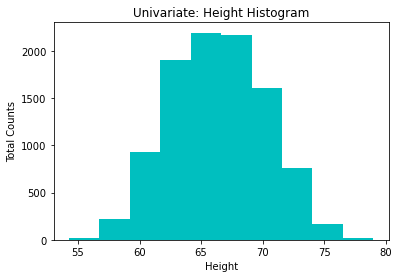

In [ ]:
# title again means you plot name.
# xlabel means label on x-axis and ylabel for y-axis
# bins will be explained in the next plot
plt.hist(x=df.Height, color='c')
plt.title("Univariate: Height Histogram")
plt.xlabel("Height")
plt.ylabel("Total Counts")
plt.plot();

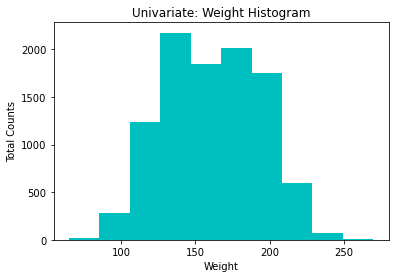

In [ ]:
plt.hist(x=df.Weight, color='c')
plt.title("Univariate: Weight Histogram")
plt.xlabel("Weight")
plt.ylabel("Total Counts")
plt.plot();

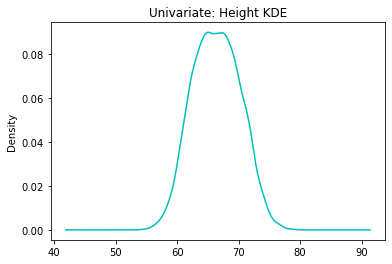

In [ ]:
# KDE distribution for Height
df.Height.plot(kind="kde", title='Univariate: Height KDE', color='c');


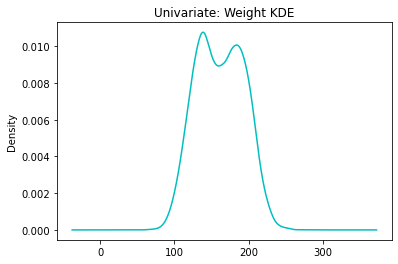

In [ ]:
# KDE distribution for Weight
df.Weight.plot(kind="kde", title='Univariate: Weight KDE', color='c');


KDE is more smoother and it gives you a bell shape curve, so we cant go for outliers.

Bivariate: Lets plot bivariate using scatter plot

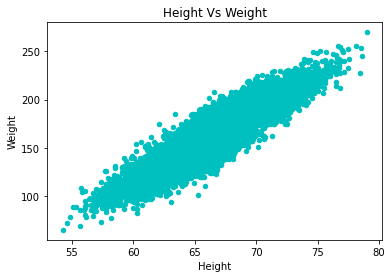

In [ ]:
# So here we are plotting a  bivariate plot type called scatter plot between height and weight.
# x = data to show in x-axis(numeric)
# y = data to show in y-axis(numeric)
# color: color of the dots
# title: name for your plot
df.plot.scatter(x="Height", y="Weight", color='c', title='Height Vs Weight');

# Regression- Predict weight using hight

In [ ]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [ ]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [ ]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2:3].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)


 Linear-Regression Model

In [ ]:
 from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()
model_fit = regressor.fit(X_train, y_train)

In [ ]:
y_predict = regressor.predict(X_test)

In [ ]:
y_predict

array([[163.3254169 ],
       [172.4561169 ],
       [141.93545547],
       ...,
       [183.17868191],
       [151.35818679],
       [140.9103195 ]])

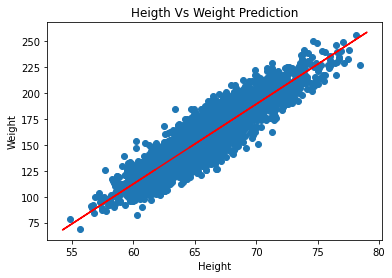

In [ ]:
plt.scatter(X_test, y_test)
plt.plot( X_train, regressor.predict(X_train), color='r')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Heigth Vs Weight Prediction")
plt.show()

# Accuracy

In [ ]:
#To find accuracy of model we have many metries like 
#R-square, mean-squared-error(MSE), root-mean-squared-error(RMSE)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(f"Model Accuracy is: {regressor.score(X_test, y_test)}")

Model Accuracy is: 0.8518184505555159


In [ ]:
# Cool we got an accuracy of 85%, which is not bad.

In [ ]:
r2_score(y_test, y_predict)

0.8518184505555159

In [ ]:
# R-squared Close to 1 is good.
# SO finally we just created our simple linear regression model.

# Classification - Predict Gender By Height & Weight

In [ ]:
# Previously we saw how to predict Weigth by Height, which is simple because:
# 1. Both were numeric values
# 2. There was only one independent variable or feature(Height).
# 3. Previously we were finding continues value like Weight but now we are finding discrete values like Male or Female. So
# here we will use classification.
# Now we wil talk about KNN classification. Here we will use two features(Heigth & Weigth) to predict Gender.

KNN classification is very simple. It will plot our data point on the graph and select the n number of neighbors(which u define) and related you datapoint to majority.

In [ ]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
X_ml = df.iloc[:, 1:3].values
y_ml = df.iloc[:, 0:1].values

In [ ]:
X_ml.shape

(10000, 2)

In [ ]:
# We can see our target variable is in string form, ML model only understands numeric values.
# To make our model work, we need to encode it to numeric values. We will use LabelEncoder class for it.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
y_ml = encoder.fit_transform(y_ml)

C:\Users\MANGESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
y_ml # so we can see now our string values are encoded. Male as 1 & Female as 0

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
y_ml.shape

(10000,)

In [ ]:
# So now we can perform KNN classification. Before that we need to split train test set.

In [ ]:
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_ml, y_ml, test_size=0.3, random_state=31)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) #n_neighbors is the number of neighbours

In [ ]:
knn.fit(X_train_ml, y_train_ml)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predict_ml = knn.predict(X_test_ml)

In [ ]:
y_predict_ml # So you can see now our model is classifying the gender


array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
# Lets plot confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test_ml, y_predict_ml)

array([[1315,  157],
       [ 138, 1390]], dtype=int64)

In [ ]:
# So our confusion matrix shows we predicted 1315+1390=2705 values correct and 138+157=295 incorrect. 
# Not bad but can we do it better?

# Lets change the n_neighbors values in KNN classifier and see

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5) #n_neighbors is the number of neighbours
knn.fit(X_train_ml, y_train_ml)
y_predict_ml = knn.predict(X_test_ml)
cm = confusion_matrix(y_test_ml, y_predict_ml)
cm

array([[1330,  142],
       [ 135, 1393]], dtype=int64)

In [ ]:
print("accuracy:", knn.score(X_test_ml, y_test_ml))

accuracy: 0.9076666666666666


In [ ]:
# accuracy of 90% which is a very good number. But let see can we increase this

# Improve Model

In [ ]:
from sklearn.model_selection import GridSearchCV
# below is the params dictionary object. Here we can add the parameters which we can experiment with. so now our model will get evaluated with all the possible 
# combination of below params and let you the best score and param combination.
params = {
    "n_neighbors": [5, 10, 20],
    'leaf_size' : [30, 40, 50],
    'algorithm': ["ball_tree", "kd_tree", "brute"],
    'p': [1, 2]
}
gs = GridSearchCV(estimator=knn, cv=10, param_grid=params )

In [ ]:
gsresult = gs.fit(X_train_ml, y_train_ml )

In [ ]:
# it may take a while as grid search cv will run your mode with all the possible combinations of given params.

In [ ]:
print(gsresult.best_score_) # So you can see we increased accuracy with more than 1% for training data.
print(gsresult.best_params_) # So this is the best possible combination for our model. Lets try with that.

0.9190000000000002
{'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 20, 'p': 1}


In [ ]:
knn_best_fit = KNeighborsClassifier(algorithm = "ball_tree", leaf_size= 30, n_neighbors = 20, p=1)
knn_best_fit.fit(X_train_ml, y_train_ml)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=20, p=1)

In [ ]:
KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=1,
                     weights='uniform')

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=20, p=1)

In [ ]:
y_predict_best = knn_best_fit.predict(X_test_ml)

In [ ]:
cm_best = confusion_matrix(y_test_ml, y_predict_best)
cm_best

array([[1352,  120],
       [ 133, 1395]], dtype=int64)

In [ ]:
print("accuracy:", knn.score(X_test_ml, y_predict_best))

accuracy: 0.9706666666666667


In [ ]:
# accuracy of our new model is 97% which means 7% more than our old model for unseen data or test data, which is amazing.
# So here we will stop with this configuration.